## 07 Milestone Project 1: 🍔👁 Food Vision Big™


In [8]:
# Use Helper function
from Helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys

## Use Tensorflow Datasets to Download Data

In [9]:
import tensorflow_datasets as tfds

datasets_list = tfds.list_builders() #get all available datasets in tfds
print('food101' in datasets_list)

True


In [10]:
# Load in the data (takes 5-6 minutes in Google Colab)
(train_data,test_data),ds_info = tfds.load("food101", split=['train', 'validation'],shuffle_files=True,as_supervised=True ,with_info=True) #as_supervised Data return in tuple format (data,label)


In [11]:
# Features of food101 from TFDS

ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [12]:
# Get the class names

class_names = ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

## Exploring the Food101 data from Tenorflow Datasets

To become one with our data, we want to find:
* class names
* The shape of our input data (image tensors)
* The data type of our input data
* What the labels look like (e.g. are they one-hot encoded or are they label encoded)
* Do the labels match up with the class names?


In [13]:
# Take one sample of the train data
train_one_sample = train_data.take(10)

In [14]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [15]:
# Output info about our training sample
for image,label in train_one_sample:
    print(f"""
Image shape:{image.shape}
Image data type:{image.dtype}
target class from Food101 :{label}
class name : {class_names[label.numpy()]}
""")


Image shape:(306, 512, 3)
Image data type:<dtype: 'uint8'>
target class from Food101 :29
class name : cup_cakes


Image shape:(512, 512, 3)
Image data type:<dtype: 'uint8'>
target class from Food101 :9
class name : breakfast_burrito


Image shape:(512, 512, 3)
Image data type:<dtype: 'uint8'>
target class from Food101 :75
class name : pho


Image shape:(384, 512, 3)
Image data type:<dtype: 'uint8'>
target class from Food101 :85
class name : samosa


Image shape:(512, 512, 3)
Image data type:<dtype: 'uint8'>
target class from Food101 :41
class name : french_onion_soup


Image shape:(384, 512, 3)
Image data type:<dtype: 'uint8'>
target class from Food101 :3
class name : beef_carpaccio


Image shape:(384, 512, 3)
Image data type:<dtype: 'uint8'>
target class from Food101 :57
class name : hummus


Image shape:(512, 512, 3)
Image data type:<dtype: 'uint8'>
target class from Food101 :41
class name : french_onion_soup


Image shape:(512, 512, 3)
Image data type:<dtype: 'uint8'>
target class 

2024-07-20 10:54:31.914870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
# What does our images look like
image

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [144,  81, 102],
        [142,  78, 102],
        [139,  75,  99]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [159,  96, 115],
        [154,  89, 111],
        [146,  83, 104]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [162,  98, 114],
        [162,  95, 113],
        [157,  93, 110]],

       ...,

       [[ 75,  32,  16],
        [ 77,  34,  17],
        [ 78,  35,  19],
        ...,
        [ 99,  31,  20],
        [104,  32,  20],
        [106,  34,  20]],

       [[ 81,  34,  18],
        [ 81,  34,  16],
        [ 82,  35,  19],
        ...,
        [102,  33,  26],
        [104,  36,  27],
        [109,  39,  31]],

       [[ 79,  30,  13],
        [ 80,  31,  14],
        [ 81,  32,  15],
        ...,
        [113,  46,  4

Text(0.5, 1.0, 'huevos_rancheros')

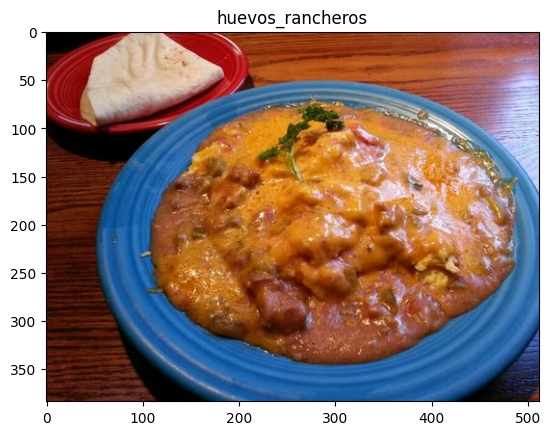

In [19]:
#Plot an image
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(class_names[label.numpy()])

In [30]:
## Create preprocessing functions for our data
import tensorflow as tf
def preprocess_image(image,label,img_shape=224):
    """Preprocesses the image for inference.
    convert unit8 to float32 and reshape image to [img_shape,img_shape,color_channel]
    """
    image = tf.image.resize(image,[img_shape,img_shape])
    return tf.cast(image,tf.float32),label

    
    

In [31]:
preprocess_images = preprocess_image(image,label,img_shape=224)[0]

In [32]:
preprocess_images

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        ...,
        [157.23973 ,  91.24997 , 110.18368 ],
        [150.2857  ,  86.622444, 107.239784],
        [144.57637 ,  80.47435 , 103.6325  ]],

       [[  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        ...,
        [157.85226 ,  91.70941 , 105.097206],
        [164.45404 ,  97.72448 , 114.3112  ],
        [159.09677 ,  93.16319 , 110.545815]],

       [[  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      ],
        ...,
        [156.04575 ,  86.47431 ,  96.6886  ],
        [156.8827  ,  89.31127 , 100.66844 ],
        [151.5303  ,  83.95888 ,  97.173164]],

       ...,

       [[ 66.50514 ,  29.862257,  13.647963],
        [ 70.

## batch and prepare datasets

In [33]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_image,num_parallel_calls=tf.data.AUTOTUNE)

#shuffle train_data and turn it to batches
train_data = train_data.shuffle(buffer_size=1024)
train_data = train_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data = test_data.map(map_func=preprocess_image,num_parallel_calls=tf.data.AUTOTUNE)

#shuffle train_data and turn it to batches
test_data = test_data.shuffle(buffer_size=1024)
test_data = test_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [34]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

## Create modelling callbacks

In [37]:
from Helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys

# create ModelCheckpoint callback to save a model's progress during training
checkpoint_path = 'model_checkpoints/cp.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,monitor='val_acc',save_best_only=True,verbose=0)

## Mixed precision

Mixed precision utilizes a combination of float32 and float16 data types to speed up model performance.

In [38]:
from tensorflow.keras import mixed_precision
mixed_precision.global_policy = mixed_precision.Policy('mixed_float16') # set global data policy to mixed precision


In [43]:
from tensorflow.keras import layers

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model 
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = layers.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x) # want one output neuron per class 
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x) 
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [44]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_float32 (Activation)    │ (None, 101)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [45]:
for layer in model.layers:
    print(f"""
layer name = {layer.name}
layer data type = {layer.dtype}
""")


layer name = input_layer
layer data type = float32


layer name = efficientnetb0
layer data type = float32


layer name = pooling_layer
layer data type = float32


layer name = dense_1
layer data type = float32


layer name = softmax_float32
layer data type = float32



## Fit feature extraction model

In [46]:
history_101_food = model.fit(train_data,epochs=3,validation_data=test_data,callbacks=[model_checkpoint_callback,create_tensorboard_callback('training_logs',"efficientNetb0_all_data")])

Saving TensorBoard log files to: training_logs/efficientNetb0_all_data/20240720-131930
Epoch 1/3


2024-07-20 13:19:33.385270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 326s 134ms/step - accuracy: 0.4348 - loss: 2.4609 - val_accuracy: 0.6589 - val_loss: 1.3065
Epoch 2/3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 305s 128ms/step - accuracy: 0.6277 - loss: 1.4579 - val_accuracy: 0.6848 - val_loss: 1.1840
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 298s 126ms/step - accuracy: 0.6660 - loss: 1.2960 - val_accuracy: 0.6930 - val_loss: 1.1423


In [47]:
# Evaluate model on whole test dataset
history_101 = model.evaluate(test_data)
history_101

790/790 ━━━━━━━━━━━━━━━━━━━━ 75s 93ms/step - accuracy: 0.6913 - loss: 1.1478


[1.144572138786316, 0.6930297017097473]

## Fine tuning our model

In [53]:

# Make all the layers in model_2_base_model trainable
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

# Recompile (we have to recompile everytime we make a change)

In [54]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_1 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [57]:
# Fine tune for another 5 epochs
fine_tune_epochs = 5 + 5

# Refit the model (same as model_2 except with more trainable layers)
history_101 = model.fit(train_data,
                                               epochs=5,
                                               validation_data=test_data,
                                               initial_epoch=history_101_food.epoch[-1], # start from previous last epoch
                                               callbacks=[create_tensorboard_callback("transfer_learning", "100_percent_fine_tune_last_10")]) # name experiment appropriately

Saving TensorBoard log files to: transfer_learning/100_percent_fine_tune_last_10/20240720-141913
Epoch 3/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 345s 144ms/step - accuracy: 0.6969 - loss: 1.1732 - val_accuracy: 0.7224 - val_loss: 1.0159
Epoch 4/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 331s 140ms/step - accuracy: 0.7316 - loss: 1.0208 - val_accuracy: 0.7343 - val_loss: 0.9703
Epoch 5/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 707s 298ms/step - accuracy: 0.7552 - loss: 0.9256 - val_accuracy: 0.7419 - val_loss: 0.9488
